In [2]:
import autogluon
import os
import warnings

import numpy as np

warnings.filterwarnings('ignore')
np.random.seed(123)

In [3]:
from autogluon.core.utils.loaders import load_zip

download_dir = './ag_multimodal_tutorial'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/petfinder_for_tutorial.zip'

load_zip.unzip(zip_file, unzip_dir=download_dir)

100%|██████████| 18.8M/18.8M [00:02<00:00, 7.94MiB/s]


In [4]:
import pandas as pd

dataset_path = f'{download_dir}/petfinder_for_tutorial'

train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
test_data = pd.read_csv(f'{dataset_path}/test.csv', index_col=0)

label_col = 'AdoptionSpeed'

In [5]:
image_col = 'Images'

train_data[image_col] = train_data[image_col].apply(lambda ele: ele.split(';')[0])
test_data[image_col] = test_data[image_col].apply(lambda ele: ele.split(';')[0])

def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

train_data[image_col] = train_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
test_data[image_col] = test_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))

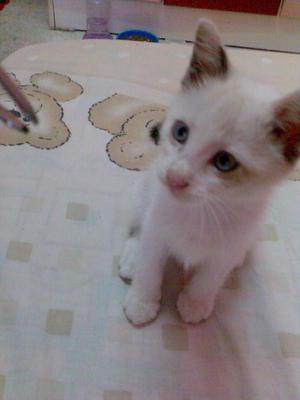

"I rescued Yumi Hamasaki at a food stall far away in Kelantan. At that time i was on my way back to KL, she was suffer from stomach problem and looking very2 sick.. I send her to vet & get the treatment + vaccinated and right now she's very2 healthy.. About yumi : - love to sleep with ppl - she will keep on meowing if she's hugry - very2 active, always seeking for people to accompany her playing - well trained (poo+pee in her own potty) - easy to bathing - I only feed her with these brands : IAMS, Kittenbites, Pro-formance Reason why i need someone to adopt Yumi: I just married and need to move to a new house where no pets are allowed :( As Yumi is very2 special to me, i will only give her to ppl that i think could take care of her just like i did (especially on her foods things).."

In [6]:
example_row = train_data.iloc[0]
example_image = example_row[image_col]

from IPython.display import Image, display
pil_img = Image(filename=example_image)
display(pil_img)

example_row['Description']

In [7]:
from autogluon.multimodal import MultiModalPredictor

predictor = MultiModalPredictor(label=label_col).fit(
    train_data=train_data,
    time_limit=120
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250531_052648"
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          8
Pytorch Version:    2.6.0+cu124
CUDA Version:       12.4
Memory Avail:       48.25 GB / 50.99 GB (94.6%)
Disk Space Avail:   193.28 GB / 235.68 GB (82.0%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [np.int64(0), np.int64(1)]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Ass

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/395M [00:00<?, ?B/s]

GPU Count: 1
GPU Count to be Used: 1

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name              | Type                | Params | Mode 
------------------------------------------------------------------
0 | model             | MultimodalFusionMLP | 207 M  | train
1 | validation_metric | BinaryAUROC         | 0      | train
2 | loss_func         | CrossEntropyLoss    | 0      | train
------------------------------------------------------------------
207 M     Trainable params
0         Non-trainable params
207 M     Total params
828.307   Total estimated model params size (MB)
1171      Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 1: 'val_roc_auc' reached 0.56250 (best 0.56250), saving model to '/content/AutogluonModels/ag-20250531_052648/epoch=0-step=1.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 4: 'val_roc_auc' reached 0.76083 (best 0.76083), saving model to '/content/AutogluonModels/ag-20250531_052648/epoch=0-step=4.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 5: 'val_roc_auc' reached 0.78056 (best 0.78056), saving model to '/content/AutogluonModels/ag-20250531_052648/epoch=1-step=5.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 8: 'val_roc_auc' reached 0.79000 (best 0.79000), saving model to '/content/AutogluonModels/ag-20250531_052648/epoch=1-step=8.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:02:02. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

Start to fuse 3 checkpoints via the greedy soup algorithm.
INFO: Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/AutogluonModels/ag-20250531_052648")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [8]:
predictions = predictor.predict(test_data.drop(columns=label_col))
predictions[:5]

INFO: Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

,AdoptionSpeed
8,1
70,1
82,1
28,0
63,1


In [9]:
probs = predictor.predict_proba(test_data.drop(columns=label_col))
probs[:5]

INFO: Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

,0,1
8,0.394667,0.605333
70,0.238373,0.761627
82,0.013983,0.986017
28,0.740737,0.259263
63,0.123646,0.876354


In [10]:
scores = predictor.evaluate(test_data, metrics=["roc_auc"])
scores

INFO: Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

{'roc_auc': np.float64(0.9072)}